**Importing The Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing The Data**

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
Task1_Data = Data

print("The head of the task 1 data is ", )

Task1_Data.head(10)

The head of the task 1 data is 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Information About The Data**

In [3]:
print("The details about the task 1 data is: ")

Task1_Data.describe()

The details about the task 1 data is: 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
print("The file contains total", Task1_Data.shape, "rows and columns respectively " )

The file contains total (25, 2) rows and columns respectively 


In [5]:
print("The maximum hrs containing row is ")

Task1_Data[Task1_Data["Hours"]==Task1_Data["Hours"].max()]

The maximum hrs containing row is 


,Hours,Scores
6,9.2,88


In [6]:
print("The minimum hrs containing row is ")

Task1_Data[Task1_Data["Hours"]==Task1_Data["Hours"].min()]

The minimum hrs containing row is 


,Hours,Scores
14,1.1,17


In [7]:
print("The sum of hours is ", Task1_Data["Hours"].sum())

The sum of hours is  125.3


In [8]:
print("The sum of scores is ", Task1_Data["Hours"].sum())

The sum of scores is  125.3


In [9]:
!pip install textblob 
from textblob import TextBlob

print("Total number of null values in the data is ")
print(Task1_Data.isna().sum())

Task1_Data.dropna(inplace=True)

Total number of null values in the data is 
Hours     0
Scores    0
dtype: int64


**Data Preparing and Data Training**

In [10]:
#split the data into input (independent) variables and output (dependent) variable.

x = Task1_Data.iloc[:, :-1].values
y = Task1_Data.iloc[:, 1].values

print(x.shape, y.shape, "are rows and columns of independent (hours) and dependent (scores) variables respectively ")

(25, 1) (25,) are rows and columns of independent (hours) and dependent (scores) variables respectively 


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape," are rows and columns of x train, x test, y train and y test respectively")
print( "Hence, 80% of independent variables (hours) are in training set and rest in test set")

(20, 1) (5, 1) (20,) (5,)  are rows and columns of x train, x test, y train and y test respectively
Hence, 80% of independent variables (hours) are in training set and rest in test set


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Predicting The Data Set**

In [13]:
y_pred_test = lr.predict(x_test)

print("The pridicted test dependent variable (scores) is ", y_pred_test)

y_pred_train = lr.predict(x_train)

print("The pridicted train dependent variable (scores) is ", y_pred_train)

The pridicted test dependent variable (scores) is  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
The pridicted train dependent variable (scores) is  [39.67865467 20.84840735 79.32128059 70.40168976 12.91988217 52.56250809
 78.33021494 34.72332643 84.27660883 93.19619966 62.47316457 36.70545772
 28.77693254 56.52677068 28.77693254 86.25874013 26.79480124 49.58931115
 90.22300272 46.6161142 ]


In [14]:
import sklearn

from sklearn.metrics import r2_score

print(" The R Squared values of test cases are ", r2_score(y_test,y_pred_test))
print(" The R Squared values of train cases are ", r2_score(y_train,y_pred_train))
print("Hence, R Squared values of both the cases are approximately same")

 The R Squared values of test cases are  0.9454906892105354
 The R Squared values of train cases are  0.9515510725211552
Hence, R Squared values of both the cases are approximately same


In [15]:
#Predicting score for 9.25 Hours

arr=np.array([[(9.25)]])
arr
Score= lr.predict(arr)

print("No of Hours = 9.25")
print("Predicted Score = {}".format(Score[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Comparison Between Predicted and Actual Values**

In [16]:
Compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  

print("Since, the test cases are of more importance then the comparison comes out as ")
Compare

Since, the test cases are of more importance then the comparison comes out as 


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visualization**

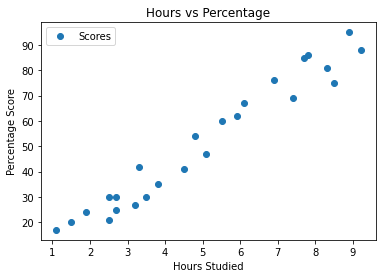

The relation between the Hours and the Score is linear


In [17]:
#Plotting Original Data

Task1_Data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

print("The relation between the Hours and the Score is linear")

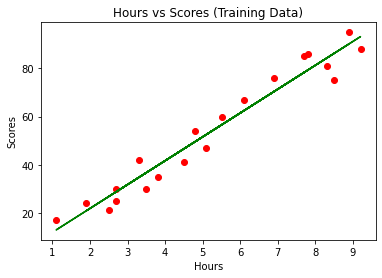

In [19]:
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, y_pred_train, color = "green")
plt.title("Hours vs Scores (Training Data)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

**Error Evaluation and Final Interpretation**

In [20]:
from sklearn import metrics

print("Mean Squared error is ", metrics.mean_squared_error(y_test,y_pred_test))
print("Mean Absolute Error is ", metrics.mean_absolute_error(y_test,y_pred_test))
print("Root Mean Squared Error is ", ((metrics.mean_squared_error(y_test,y_pred_test))**2) )

Mean Squared error is  21.598769307217456
Mean Absolute Error is  4.183859899002982
Root Mean Squared Error is  466.50683558639884
